# Ensemble Model Assignment 2: Norberto Rancharan


### For this assignment use data at: “https://www.kaggle.com/wendykan/lending-club-loan-data/download”

1. Read the data and do the preprocessing similar to the GBM file submitted to eLearning. Try not to exclude any variable as much as possible.

2. Split the sample to test and train.

3. Use sklearn to build a GBM model to predict whether a customer has any delinquent account. Do Grid search on as many parameters as you find useful. Include “Number of Trees”, and “Learning Rate” for sure. Use the train sample.

4. For each model, store the AUC on the test and train. At the end, choose the best model that gives you the best bias-variance.

5. Draw a histogram for predicted probabilities in each class. Something like the following graph, where for example orange is class 0 and blue is class 1. How should the ideal graph look like?


# Importing Necessary Libraries

In [1]:
# Import packages
import pandas as pd
import pickle
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn.externals import joblib

C:\Users\Norberto J Rancharan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

# Converting CSV File to Pickle for Faster Reading In

In [3]:
# Converting the large csv file into a pickle file for faster reading 
# For this dataset it took 50.73s to read the CSV file
# With Pickle it took 12.31s 

#loan_dat = pd.read_csv("loan.csv")
#with open("loan.pickle","wb") as f:
#    pickle.dump(loan_dat,f)

In [4]:
with open("loan.pickle", "rb") as f:
    loan_dat = pickle.load(f)

# Data Visualization

In [5]:
loan_dat.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e+00,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,39.303090,7.024194e+00,35.782223,5.002082e-01,3.67

In [6]:
loan_dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.0000,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.4900,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.6500,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840000,24.490000,9.990000e+02


In [7]:
type(loan_dat.describe())

pandas.core.frame.DataFrame

In [8]:
# Replace the name of some columns
loan_dat = loan_dat.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
loan_dat.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

## Loans Distributions

We can observe that most of the loan values that borrowers applied for, investors committed, and lenders issued, fall between USD10,000 to USD20,000

Text(0.5, 1.0, 'Total committed by Investors')

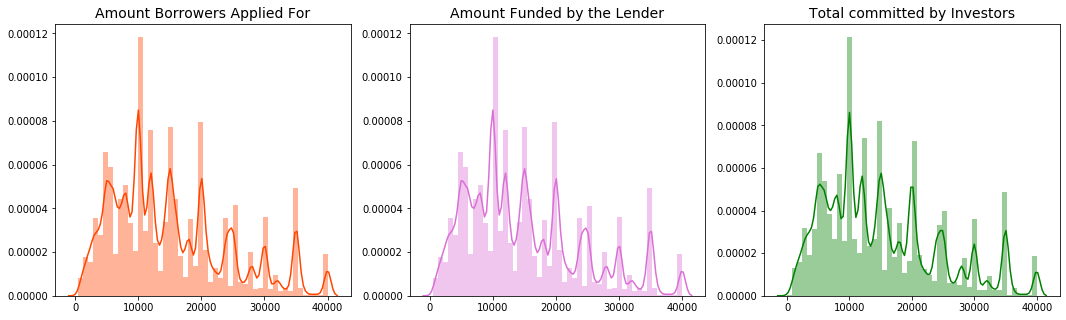

In [9]:
fig, ax = plt.subplots(1,3,figsize=(18,5))

loan_amount = loan_dat['loan_amount'].values
funded_amount = loan_dat['funded_amount'].values
investor_funds = loan_dat['investor_funds']. values

sns.distplot(loan_amount, ax=ax[0], color = 'orangered')
ax[0].set_title("Amount Borrowers Applied For", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="orchid")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="green")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [10]:
# Converting the Issue Dates by Year for simplicity

datetime_series = pd.to_datetime(loan_dat['issue_d'])
loan_dat['Year']= datetime_series.dt.year

## Observing The Average Loan Values Issued

In [11]:
loan_dat.groupby('Year')['loan_amount'].mean()

Year
2007     8254.519071
2008     8825.428333
2009     9833.033516
2010    10528.240408
2011    12047.503568
2012    13461.709015
2013    14707.413733
2014    14870.156793
2015    15240.285862
2016    14734.039046
2017    14845.060463
2018    16025.020394
Name: loan_amount, dtype: float64

Text(0, 0.5, 'Loan Value')

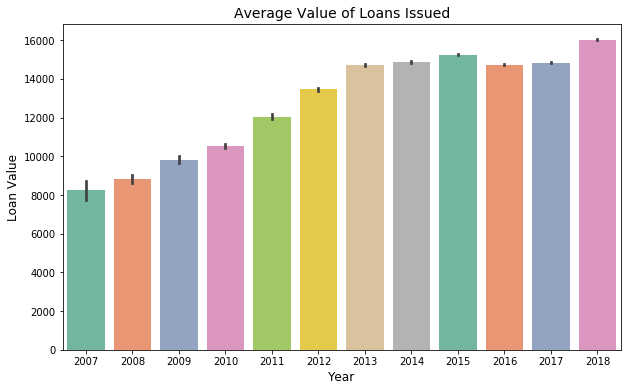

In [12]:
plt.figure(figsize=(10,6))
sns.barplot('Year','loan_amount', data=loan_dat, palette='Set2')
plt.title('Average Value of Loans Issued', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Loan Value', fontsize = 12)


## Comparing Good Loans and Bad Loans in Dataset

In [13]:
loan_dat['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [14]:
# Determining which loans are considered good loans or bad loans
bad_loan = ['Late (31-120 days)','In Grace Period','Charged Off', 
             'Late (16-30 days)', 'Default',
             'Does not meet the credit policy. Status:Charged Off',
             ]

# Creating a blank new column that will be filled with the new
#classification of the loan condition (Bad or Good)
loan_dat['loan_condition'] = np.nan

# Creating a function that will check the bad loans list
# if the value of the cell in the df is in bad_loans, it identifies it as 'Bad Loan'
# otherwise, if it is not in the list, it will give it a value of 'Good Loan'
def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'

# Filling in the 'loan_condition' column with the new classes (Good or Bad)
loan_dat['loan_condition'] = loan_dat['loan_status'].apply(loan_condition)

[Text(0, 0, 'Good'), Text(0, 0, 'Bad')]

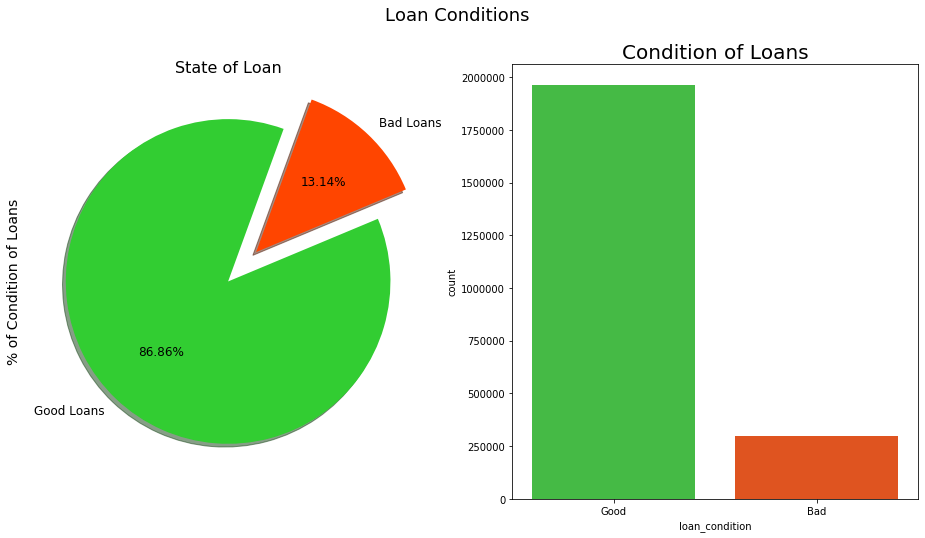

In [15]:
f,ax = plt.subplots(1,2,figsize = (16,8))

colors = ['limegreen','orangered']
labels = 'Good Loans','Bad Loans'

plt.suptitle('Loan Conditions', fontsize=18)

loan_dat['loan_condition'].value_counts().plot.pie(explode=[0,0.25], 
                                                   autopct='%1.2f%%', ax=ax[0], 
                                                   shadow=True, colors=colors, 
                                                   labels=labels, fontsize=12,startangle=70)

ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

sns.countplot('loan_condition', data=loan_dat, ax=ax[1], palette=colors)
ax[1].set_title('Condition of Loans', fontsize=20)
ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')

Text(0.5, 0, 'Year')

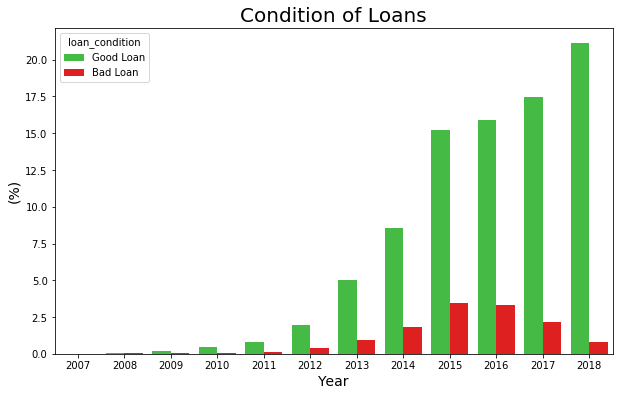

In [16]:
plt.figure(figsize=(10,6))
palette = ["limegreen", "red"]

sns.barplot(x="Year", y="loan_amount", hue="loan_condition", data=loan_dat,
            palette=palette, estimator=lambda x: len(x) / len(loan_dat) * 100)
plt.title('Condition of Loans', fontsize=20)
plt.ylabel("(%)", fontsize=14)
plt.xlabel('Year', fontsize=14)

## Observing Loan Condition by Region

In [17]:
loan_dat['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



loan_dat['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


loan_dat['region'] = loan_dat['addr_state'].apply(finding_regions)

In [18]:
# This code will take the current date and transform it into a year-month format
loan_dat['complete_date'] = pd.to_datetime(loan_dat['issue_d'])

group_dates = loan_dat.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amount'] = group_dates['loan_amount']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amount']])

In [19]:
loan_condition_region = loan_dat.groupby(['region','loan_condition']).agg({'loan_amount': ['count','mean'], 
                                                                          'funded_amount': 'mean'})
loan_condition_region

loan_amount               funded_amount
                               count          mean          mean
region    loan_condition                                        
MidWest   Bad Loan             50961  15245.337611  15240.144424
          Good Loan           352189  14627.484036  14623.778710
NorthEast Bad Loan             69693  15951.712152  15942.548750
          Good Loan           449402  15066.194688  15060.515029
SouthEast Bad Loan             74578  15523.480785  15515.688608
          Good Loan           475587  14775.183090  14770.621726
SouthWest Bad Loan             36182  16203.024985  16196.123072
          Good Loan           236607  15277.602522  15272.659938
West      Bad Loan             65619  15719.477209  15709.943766
          Good Loan           449850  15089.299822  15084.072691

Text(0.5, 1.0, 'No. of Good/Bad Loans by Region')

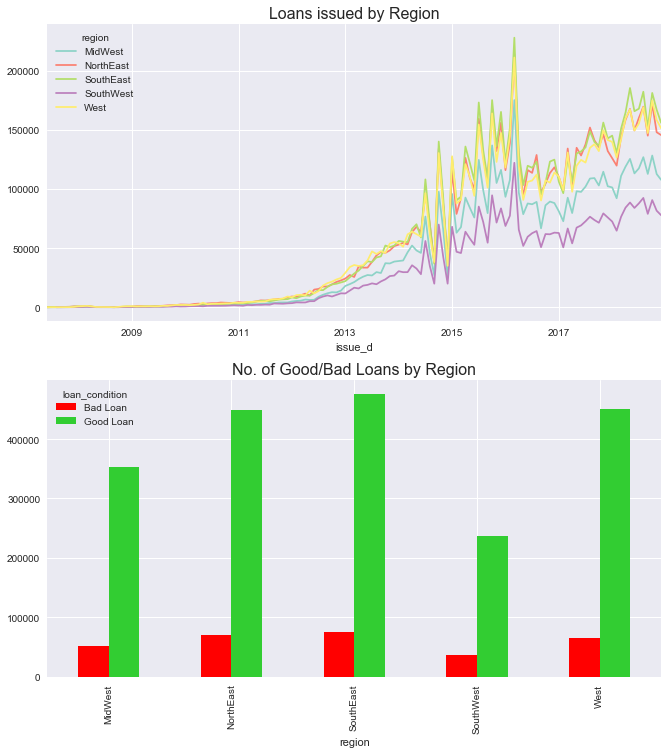

In [20]:
plt.style.use('seaborn')
f, ((ax1, ax2)) = plt.subplots(2,1)

cmap = plt.cm.Set3
colors = ['red','limegreen']

figsize = (11,12)

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, ax = ax1, 
                                grid=True, legend=True, figsize=figsize)
ax1.set_title('Loans issued by Region', fontsize=16)

condition_per_region = loan_dat.groupby(['region','loan_condition']).loan_amount.count()
condition_per_region.unstack().plot(kind='bar', color= colors, ax=ax2, figsize=figsize)
ax2.set_title('No. of Good/Bad Loans by Region', fontsize=16)

#  Observing Loans by Credit Score ('Grade')

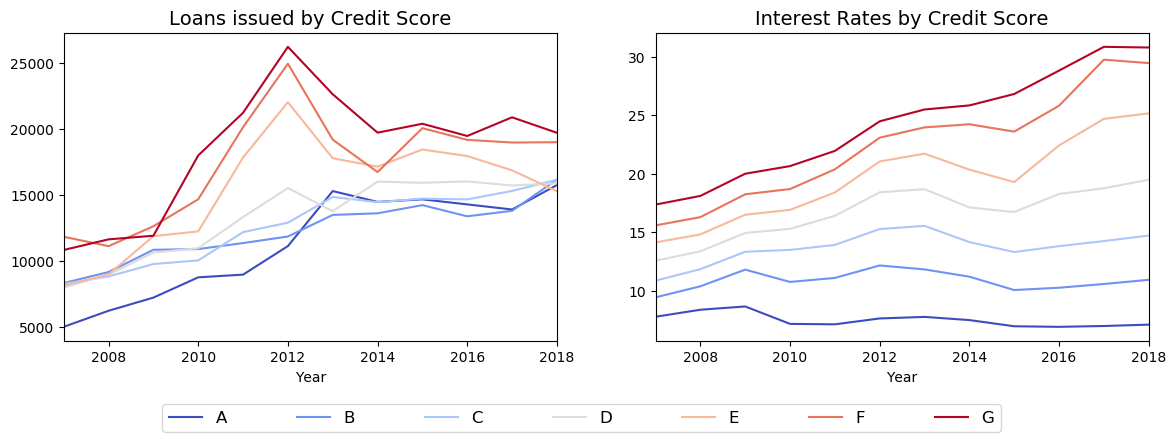

In [21]:
# Let's visualize how many loans were issued by creditscore
plt.style.use('default')
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = loan_dat.groupby(['Year', 'grade']).loan_amount.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = loan_dat.groupby(['Year', 'grade']).interest_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

## Condition by Grade

In [22]:
loan_condition_grade = loan_dat.groupby(['grade','loan_condition']).agg({'loan_amount':['count','mean']})
loan_condition_grade

loan_amount              
                           count          mean
grade loan_condition                          
A     Bad Loan             16025  14015.631825
      Good Loan           417002  14625.928413
B     Bad Loan             58758  13822.036148
      Good Loan           604799  14207.468225
C     Bad Loan             95580  14979.322295
      Good Loan           554473  15048.212537
D     Bad Loan             67425  16118.064887
      Good Loan           256999  15605.445352
E     Bad Loan             38881  18146.158792
      Good Loan            96758  17174.572645
F     Bad Loan             15420  19601.485084
      Good Loan            26380  18845.918309
G     Bad Loan              4944  20442.789239
      Good Loan             7224  20343.746539

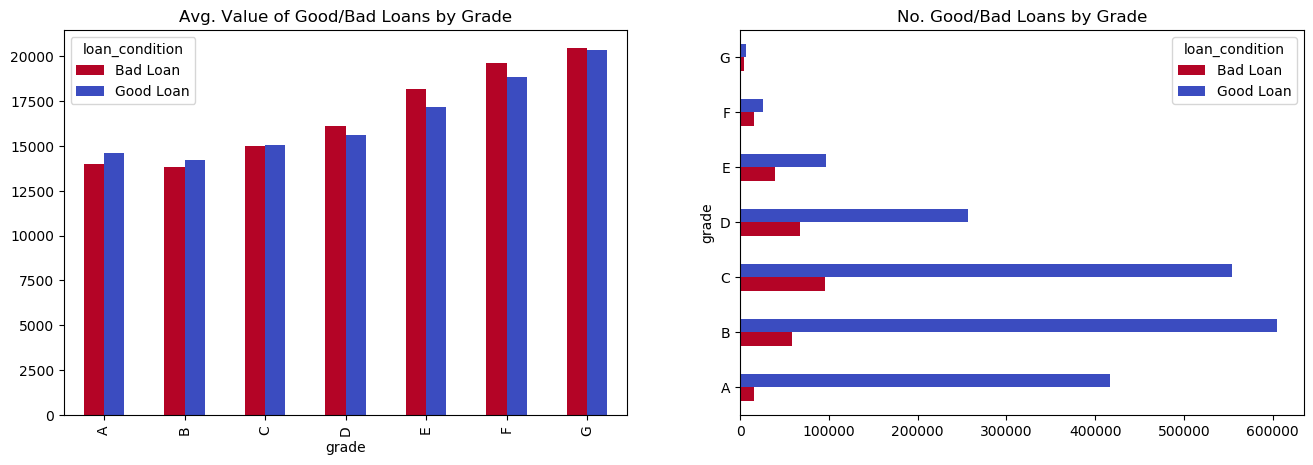

In [23]:
f, ((ax1,ax2)) = plt.subplots(1,2)
cmap = plt.cm.coolwarm_r

title = 'Avg. Value of Good/Bad Loans by Grade'
loan_condition_grade.loan_amount['mean'].unstack().plot(kind='bar', title = title, ax = ax1, figsize=(16,5),colormap=cmap)

title = 'No. Good/Bad Loans by Grade'
loan_condition_grade.loan_amount['count'].unstack().plot(kind='barh', title = title, ax = ax2, figsize=(16,5),colormap=cmap)




Text(0, 0.5, 'Interest Rate (%)')

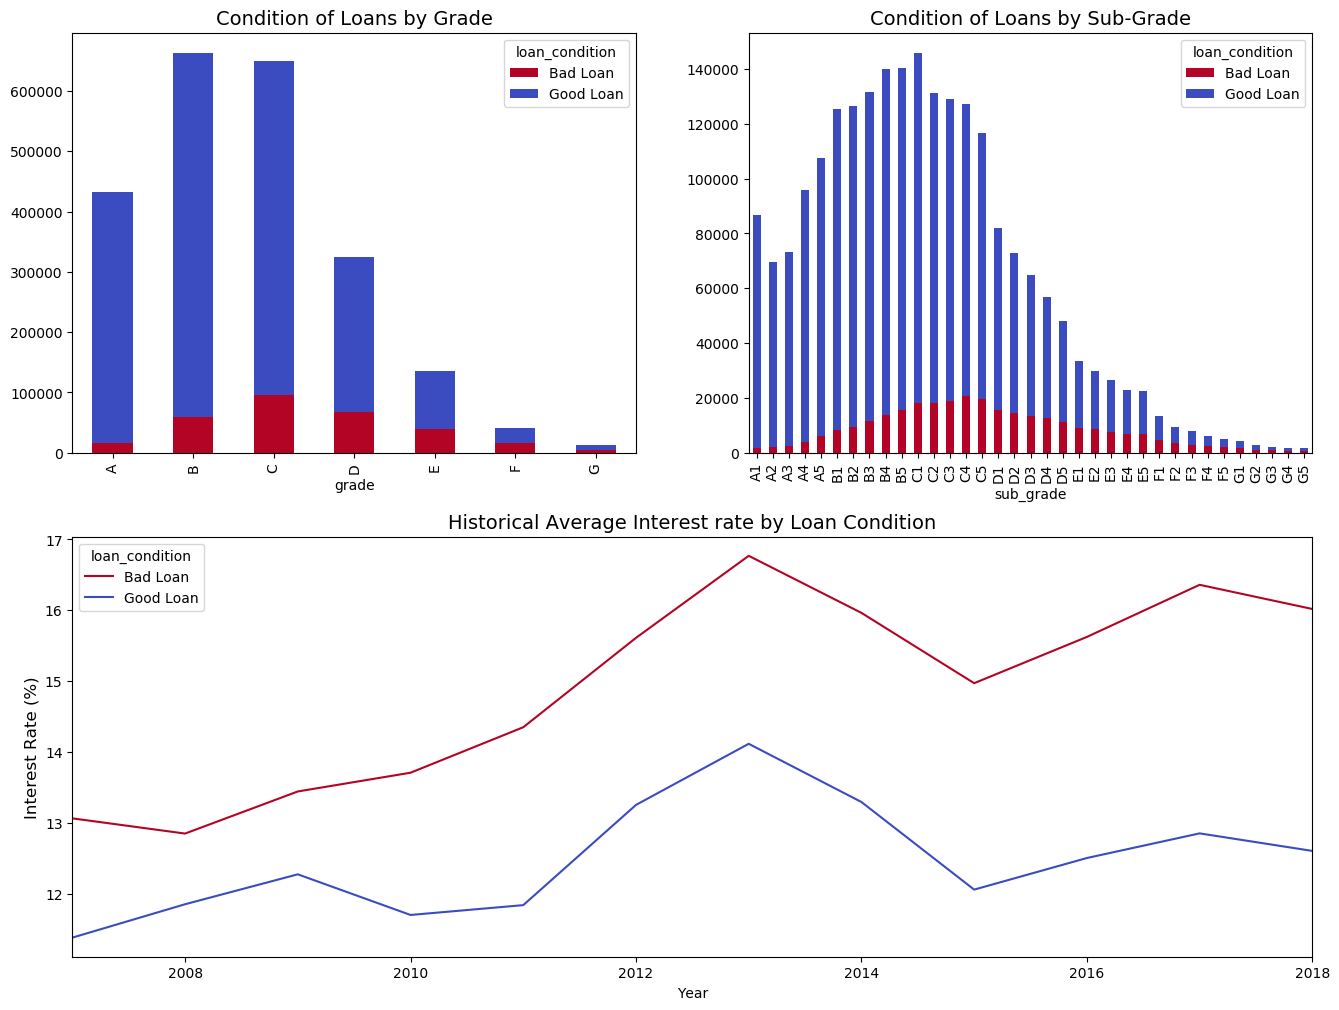

In [24]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_grade = loan_dat.groupby(['grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Condition of Loans by Grade', fontsize=14)


loans_by_subgrade = loan_dat.groupby(['sub_grade', 'loan_condition']).size()
loans_by_subgrade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Condition of Loans by Sub-Grade', fontsize=14)

by_interest = loan_dat.groupby(['Year', 'loan_condition']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Historical Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

In [25]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [loan_dat]
loan_dat['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

In [26]:
# We have 299,021 loans categorized as bad loans
badloans_df = loan_dat.loc[loan_dat["loan_condition"] == "Bad Loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,
MidWest,45202,9,142,1449,550,3609,50961
NorthEast,60827,7,190,2356,957,5356,69693
SouthEast,65460,5,184,2359,974,5596,74578
SouthWest,31833,4,79,1009,463,2794,36182
West,58333,6,166,1779,793,4542,65619


In [27]:
# Creating Categories of Annual Income 
# (Low <= 40,000),(40,000 < Medium <= 120,000),(High > 120,000)
loan_dat['income_category'] = np.nan
lst = [loan_dat]

for col in lst:
    col.loc[col['annual_income'] <= 40000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 40000) & (col['annual_income'] <= 120000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 120000, 'income_category'] = 'High'

In [28]:
lst = [loan_dat]
loan_dat['loan_condition_int'] = np.nan

for col in lst:
    col.loc[loan_dat['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[loan_dat['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
loan_dat['loan_condition_int'] = loan_dat['loan_condition_int'].astype(int)

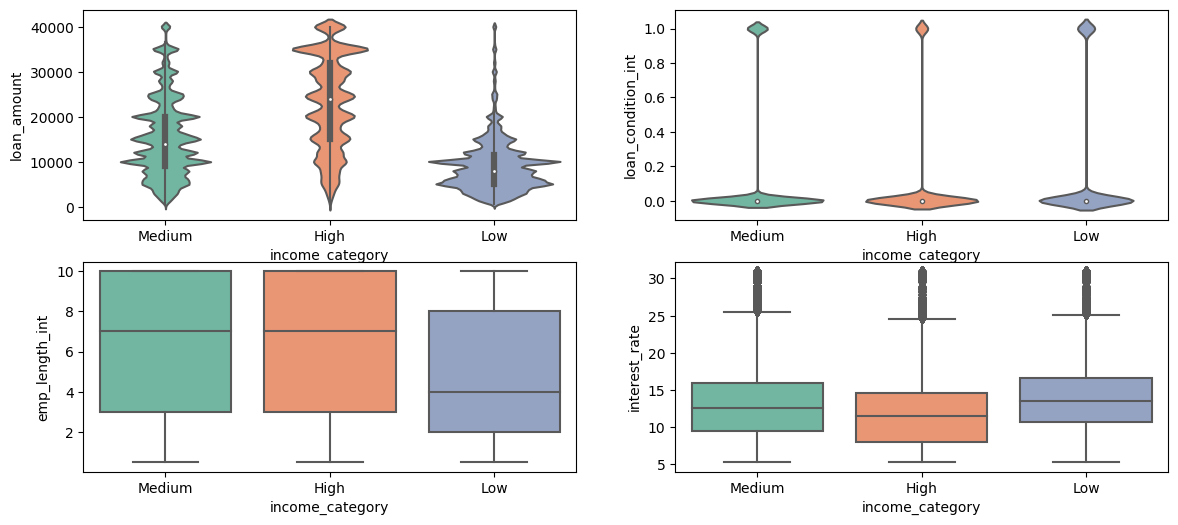

In [29]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amount", data=loan_dat, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=loan_dat, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=loan_dat, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="interest_rate", data=loan_dat, palette="Set2", ax=ax4)

Text(0, 0.5, 'Interest Rate (%)')

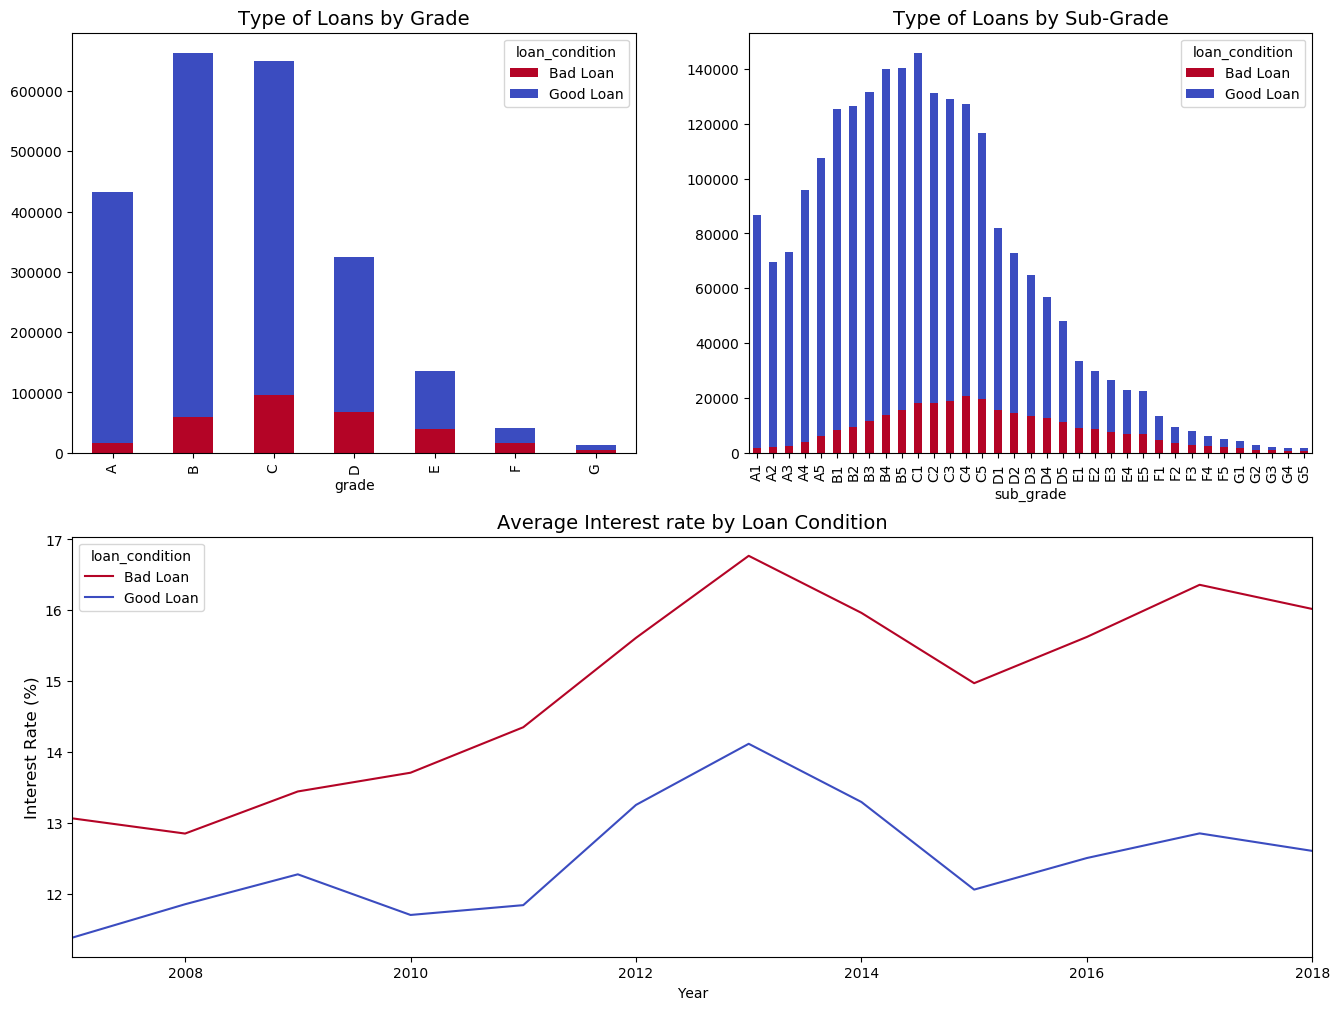

In [30]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = loan_dat.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = loan_dat.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = loan_dat.groupby(['Year', 'loan_condition']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

In [31]:
# Selecting only numeric variables
numeric_variables = loan_dat.select_dtypes(exclude=["object"])

# Data Preprocessing

Checking to see which variables have missing values

There are 145 Columns that have missing values


In [32]:
loan_dat_copy = loan_dat.copy()

In [33]:
x_missing = loan_dat.isnull().sum()
print("Number of Columns with Missing Values = {}".format(len(x_missing)))

Number of Columns with Missing Values = 145


In [34]:
x_missing = pd.DataFrame(x_missing[x_missing>0],columns=['Amount Missing'])
x_missing.sort_index()

,Amount Missing
acc_now_delinq,29
acc_open_past_24mths,50030
all_util,866348
annual_inc_joint,2139958
annual_income,4
avg_cur_bal,70346
bc_open_to_buy,74935
bc_util,76071
chargeoff_within_12_mths,145
collections_12_mths_ex_med,145


# Handling Outliers

I'm choosing to identify outliers by the Z-Score method. Basically, we are trying to identify those values that are far from the mean. Any value above the 3rd quartile will be considered to be an outlier. 

In [35]:
# This function calculates the z-score of numerical columns (that are not supposed to be negative)
# it then compares that z-score to the third quartile value, if it is above then it is an outlier.
# The result is a dataframe with all the outliers.

def outlier_identifier(data,colname):
    outliers = pd.DataFrame(columns=[colname])
    
    threshold = 3
    mu = np.mean(data[colname])
    sigma = np.std(data[colname])
    
    for i in range(len(data.loc[:,colname])):
        z_stat = (data.loc[i,colname] - mu) / sigma
        if z_stat > 3:
            outliers.loc[i,colname] = data.loc[i,colname]
            
    return outliers

We are interested in identifying outliers in the reported annual income. This column can contain imputation errors. Most of the time, annual income shouldn't have a negative value, so we can run the outlier_identifier function on this column. Considering it is a large data set (+2 Million rows), and only +6,000 outliers have been found, we will drop these outliers. 

In [36]:
temp_drop = outlier_identifier(loan_dat_copy,'annual_income')

In [37]:
loan_dat_copy = loan_dat_copy.drop(temp_drop.index.to_list())

# Removing Irrelevant Columns

In [38]:
# Dropping Columns that have redundant information, have no use, or information that won't be accessible for new customers

temp_data_main = loan_dat_copy.drop(columns = ['collection_recovery_fee','home_ownership'
                                          ,'interest_rate','issue_d','last_pymnt_amnt','last_pymnt_d'
                                          ,'out_prncp','out_prncp_inv','purpose','recoveries','income_category'
                                          ,'sub_grade','total_pymnt','total_pymnt_inv','total_rec_int'
                                          ,'total_rec_late_fee','total_rec_prncp','verification_status'
                                          ,'verification_status_joint','earliest_cr_line'
                                          ,'last_credit_pull_d','next_pymnt_d','hardship_start_date'
                                          ,'hardship_end_date','payment_plan_start_date','debt_settlement_flag'
                                          ,'debt_settlement_flag_date','settlement_date'
                                          ,'sec_app_earliest_cr_line', 'emp_length_int'
                                          ,'loan_condition','complete_date'
                                          ,'loan_condition_int','Year','settlement_status'
                                          ,'settlement_amount','settlement_percentage'
                                          ,'settlement_term'],axis=1)

In [39]:
temp_data = temp_data_main.copy()

In [40]:
x_missing = temp_data.isnull().sum()
print("Number of Columns with Missing Values = {}".format(len(x_missing)))
x_missing = pd.DataFrame(x_missing[x_missing>0],columns=['Amount Missing'])
x_missing.sort_index()

Number of Columns with Missing Values = 107


,Amount Missing
acc_now_delinq,29
acc_open_past_24mths,49920
all_util,864522
annual_inc_joint,2133780
annual_income,4
avg_cur_bal,70214
bc_open_to_buy,74773
bc_util,75858
chargeoff_within_12_mths,144
collections_12_mths_ex_med,144


# Analysis of Missing Values for Imputation

In [41]:
data_types = temp_data.dtypes
temp_null = pd.DataFrame(temp_data.isnull().sum(),columns=['AmountNull'])
temp_null['Data Types'] = data_types
temp_null['%Missing'] = 0

In [42]:
for i in range(len(temp_null.iloc[:,0])):
    temp_null.iloc[i,2] = (temp_null.iloc[i,0] / temp_data.shape[0])*100

In [43]:
# There are 102 Columns that have Null Values
temp_null = temp_null[temp_null['%Missing'] > 0]
print('# Columns >=75% Missing = {}'.format(len(temp_null[temp_null['%Missing'] > 75])))
print('# Columns that are float64 >=75% Missing = {}'
      .format(len(temp_null[(temp_null['%Missing'] > 75) & (temp_null['Data Types'] == 'float64')])))
print('# Columns that are object >=75% Missing = {}'
      .format(len(temp_null[(temp_null['%Missing'] > 75) & (temp_null['Data Types'] == 'object')])))

temp_null.sort_values(by='%Missing', ascending=False)

# Columns >=75% Missing = 25
# Columns that are float64 >=75% Missing = 21
# Columns that are object >=75% Missing = 4


,AmountNull,Data Types,%Missing
orig_projected_additional_accrued_interest,2245953,float64,99.627299
hardship_last_payment_amount,2243766,float64,99.530287
hardship_length,2243766,float64,99.530287
hardship_reason,2243766,object,99.530287
hardship_status,2243766,object,99.530287
deferral_term,2243766,float64,99.530287
hardship_amount,2243766,float64,99.530287
hardship_type,2243766,object,99.530287
hardship_dpd,2243766,float64,99.530287
hardship_loan_status,2243766,object,99.530287


In [44]:
# The number of Columns with Nulls by Data Types
temp_null['Data Types'].value_counts()

float64    86
object      5
Name: Data Types, dtype: int64

In [45]:
temp_float = temp_null[temp_null['Data Types'] == 'float64']
temp_float.iloc[0:43,:].head()

,AmountNull,Data Types,%Missing
annual_income,4,float64,0.000177
dti,1711,float64,0.075898
delinq_2yrs,29,float64,0.001286
inq_last_6mths,30,float64,0.001331
mths_since_last_delinq,1155722,float64,51.266194


In [46]:
temp_float.iloc[44:89,:].head()

,AmountNull,Data Types,%Missing
mths_since_recent_bc_dlq,1736339,float64,77.021543
mths_since_recent_inq,294947,float64,13.083432
mths_since_recent_revol_delinq,1516342,float64,67.262787
num_accts_ever_120_pd,70144,float64,3.111489
num_actv_bc_tl,70144,float64,3.111489


# Handling Categorical Values

Most of the categorical values can be imputed manually since most of those missing are those accounts that didn't experience hardship. Therefore, they don't have a value. 

Handling Ordinal Categorical Date - The columns that have been identified as Ordinal can be manually converted to numericals.

Handling Non-Ordinal Data - The columns that have been identified as Non-Ordinal don't have missing values, so we can use GetDummies to convert them into columns of 1s and 0s. 

### Defining Numerical Values for Ordinal Categorical Data

In [47]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0.5
    },
    "loan_status": {
        'Current': 0, 
        'Fully Paid': 0,
        'Late (31-120 days)': 1,
        'In Grace Period': 1,
        'Charged Off': 1,
        'Late (16-30 days)': 1,
        'Default': 1,
        'Does not meet the credit policy. Status:Fully Paid': 1,
        'Does not meet the credit policy. Status:Charged Off': 1
    },
    
    "grade": {
        "A": 7,
        "B": 6,
        "C": 5,
        "D": 4,
        "E": 3,
        "F": 2,
        "G": 1 
    },
    "hardship_type": {
        "nan": 0,
        "INTEREST ONLY-3 MONTHS DEFERRAL" : 1 
    },
    "hardship_reason": {
        "nan": 0,
        'UNEMPLOYMENT': 1,
        'NATURAL_DISASTER': 1,
        'EXCESSIVE_OBLIGATIONS': 1,
        'MEDICAL': 1,
        'INCOME_CURTAILMENT': 1, 
        'DISABILITY': 1, 
        'REDUCED_HOURS': 1,
        'FAMILY_DEATH': 1,
        'DIVORCE': 1
    },
    "hardship_status": {
        'nan': 0,
        'ACTIVE': 1, 
        'COMPLETED': 1, 
        'BROKEN': 1
    },
    "hardship_loan_status": {
        'nan': 0, 
        'Late (16-30 days)': 1, 
        'Issued': 1,
        'Current': 1,
        'Late (31-120 days)': 1,
        'In Grace Period': 1
    }   
}

In [48]:
# 0 is assigned to these columns, to mean 'Not in Difficult Situation', because 
# we want to see whether or not the person has a 'Hardship Situation' or 'Settlement Situation'.
hardship = ['hardship_type','hardship_reason','hardship_status',
           'hardship_status','hardship_loan_status']

for i in hardship:
    temp_data[i].fillna(0,inplace=True)

## Use GetDummies on Non-Ordinal Categorical Data

In [49]:
category_columns = ['term','pymnt_plan','addr_state','initial_list_status',
                   'application_type','hardship_flag','region', 'disbursement_method']
dummies = pd.get_dummies(temp_data[category_columns], drop_first=True)
temp_data = pd.concat([temp_data,dummies],axis=1)

In [50]:
temp_data = temp_data.drop(category_columns,axis=1)

In [51]:
temp_data = temp_data.replace(mapping_dict)

###  Checking for Missing Values of Categorical Variables

In [52]:
data_types_cat = temp_data.dtypes
temp_null_cat = pd.DataFrame(temp_data.isnull().sum(),columns=['AmountNull'])
temp_null_cat['Data Types'] = data_types_cat
temp_null_cat['%Missing'] = 0

for i in range(len(temp_null.iloc[:,0])):
    temp_null_cat.iloc[i,2] = (temp_null_cat.iloc[i,0] / temp_data.shape[0])*100
    
    # There are 102 Columns that have Null Values
temp_null_cat = temp_null_cat[temp_null_cat['%Missing'] > 0]
print('# Columns that are object >0% Missing = {}'
      .format(len(temp_null_cat[(temp_null_cat['%Missing'] > 0) & (temp_null_cat['Data Types'] == 'object')])))

temp_null_cat.sort_values(by='%Missing', ascending=False).head()

# Columns that are object >0% Missing = 0


,AmountNull,Data Types,%Missing
sec_app_mths_since_last_major_derog,2218445,float64,98.407083
sec_app_revol_util,2148302,float64,95.295639
revol_bal_joint,2146466,float64,95.214197
sec_app_open_act_il,2146465,float64,95.214152
sec_app_inq_last_6mths,2146465,float64,95.214152


# Splitting Data into Test and Train

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

In [54]:
# Original Data

X = temp_data.loc[:, temp_data.columns != 'loan_status']
y = temp_data.loc[:, temp_data.columns == 'loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2,
                                                   shuffle = True,
                                                   random_state = 111,
                                                   stratify = y)
print("Original data shapes: {}, {}".format(X_train.shape, X_test.shape))

Original data shapes: (1803484, 158), (450871, 158)


# Imputing by Variable Relationship (Negative vs. Positive)

### Designating Variable Relationship with the Dependent Variable

In [55]:
# Columns to fill with -100000000 (Negative Relationship between X Variables and Predictor Y)
negative_relation = ['annual_income',
                    'mths_since_last_delinq',
                    'mths_since_last_record',
                    'open_acc',
                    'revol_util',
                    'total_acc',
                    'mths_since_last_major_derog',
                    'annual_inc_joint',
                    'tot_cur_bal',
                    'open_acc_6m',
                    'total_bal_il',
                    'il_util',
                    'open_rv_12m',
                    'open_rv_24m',
                    'all_util',
                    'inq_fi',
                    'total_cu_tl',
                    'avg_cur_bal',
                    'bc_util',
                    'mo_sin_old_il_acct',
                    'mo_sin_old_rev_tl_op',
                    'mo_sin_rcnt_rev_tl_op',
                    'mo_sin_rcnt_tl',
                    'mths_since_recent_bc_dlq',
                    'mths_since_recent_revol_delinq',
                    'mths_since_recent_bc',
                    'num_actv_bc_tl',
                    'num_actv_rev_tl',
                    'num_bc_sats',
                    'num_bc_tl',
                    'num_il_tl',
                    'num_op_rev_tl',
                    'num_rev_accts',
                    'num_rev_tl_bal_gt_0',
                    'num_sats',
                    'pct_tl_nvr_dlq',
                    'revol_bal_joint',
                    'sec_app_open_acc',
                    'sec_app_revol_util',
                    'sec_app_open_act_il',
                    'sec_app_num_rev_accts',
                    'sec_app_mths_since_last_major_derog',
                    'hardship_last_payment_amount'
                    ]

# Columns to fill with 100000000 (Positive Relationship between X variable and predictor Y)
positive_relation = ['delinq_2yrs',
                    'dti',
                    'inq_last_6mths',
                    'pub_rec',
                    'collections_12_mths_ex_med',
                    'dti_joint',
                    'acc_now_delinq',
                    'tot_coll_amt',
                    'open_act_il',
                    'open_il_12m',
                    'open_il_24m',
                    'mths_since_rcnt_il',
                    'max_bal_bc',
                    'total_rev_hi_lim',
                    'inq_last_12m',
                    'acc_open_past_24mths',
                    'bc_open_to_buy',
                    'chargeoff_within_12_mths',
                    'delinq_amnt',
                    'mort_acc',
                    'mths_since_recent_inq',
                    'num_accts_ever_120_pd',
                    'num_tl_120dpd_2m',
                    'num_tl_30dpd',
                    'num_tl_90g_dpd_24m',
                    'num_tl_op_past_12m',
                    'percent_bc_gt_75',
                    'pub_rec_bankruptcies',
                    'tax_liens',
                    'total_bal_ex_mort',
                    'tot_hi_cred_lim',
                    'total_bc_limit',
                    'total_il_high_credit_limit',
                    'sec_app_inq_last_6mths',
                    'sec_app_mort_acc',
                    'sec_app_chargeoff_within_12_mths',
                    'sec_app_collections_12_mths_ex_med',
                    'deferral_term',
                    'hardship_amount',
                    'hardship_length',
                    'hardship_dpd',
                    'orig_projected_additional_accrued_interest',
                    'hardship_payoff_balance_amount',
                    ]

In [56]:
X_train_relation = X_train
X_test_relation = X_test

for i in negative_relation:
    X_train_relation[i].fillna(-100000000,inplace=True)
    X_test_relation[i].fillna(-100000000,inplace=True)
    
for i in positive_relation:
    X_train_relation[i].fillna(100000000,inplace=True)
    X_test_relation[i].fillna(100000000,inplace=True)

C:\Users\Norberto J Rancharan\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Imputation for Employment Length

The Employment Length will firstly be imputed by flags that represent the variable having a negative relationship with Delinquency.

This particular Ordinal Categorical column will be imputed with mean or median values in the other tests.

In [57]:
# Null values for Employment Length will be assigned -100000000 to show its negative relationship with delinquency
# longer employment lengths, lower probabilities of delinquency
X_train_relation['emp_length'].fillna(-100000000,inplace=True)
X_test_relation['emp_length'].fillna(-100000000,inplace=True)

### Building the GBM Model and Fitting on Train Set with Imputed Value of Relationship Variables

In [60]:
# Building Gradient Boosting Machine Classifier Model
params = {'n_estimators': 100,'max_leaf_nodes':8,'learning_rate': 0.1, 'random_state':1}
gbm_clf = GradientBoostingClassifier(**params)

In [61]:
estimator = gbm_clf.fit(X_train_relation, y_train.values.ravel())
estimator

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=8,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
pd.DataFrame(gbm_clf.predict_proba(X_test_relation))

,0,1
0,0.633759,0.366241
1,0.939654,0.060346
2,0.763545,0.236455
3,0.909335,0.090665
4,0.705951,0.294049
...,...,...
450866,0.874505,0.125495
450867,0.895918,0.104082
450868,0.883138,0.116862
450869,0.902900,0.097100


In [74]:
roc_auc_score(y_test, gbm_clf.predict_proba(X_test_relation)[:,1])

0.7313275287897656

# Imputing by Median Value

In [58]:
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

In [76]:
pipe_impute_median = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(), gbm_clf)
scores = cross_val_score(pipe_impute_median, X_train_array, y_train_array, scoring='roc_auc', cv=10)


In [78]:
print("Median Imputation Model's Average AUC: {}".format(round(scores.mean(),6)))

Median Imputation Model's Average AUC: 0.73


## Observation of Imputation Methods

Provided that we have seen similar results of AUC based on the two imputation methods, the Median imputation approach will be used moving forward

# Feature Selection

In [79]:
gbm_clf.fit(RobustScaler().fit_transform(
    SimpleImputer(strategy='median').fit_transform(X_train_array)), y_train_array)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=8,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

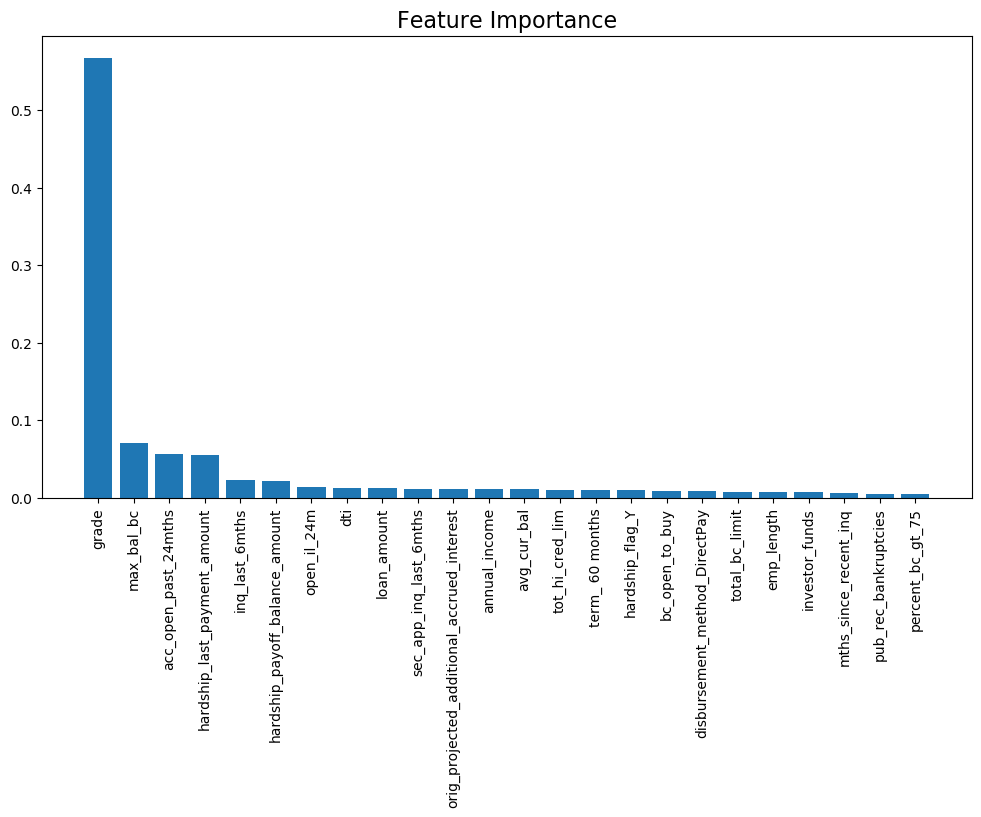

In [80]:
# Plot feature importance

important_feats = gbm_clf.feature_importances_
indices = np.argsort(important_feats)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 25), important_feats[indices[:24]], align="center")
plt.xticks(range(1, 25),
           temp_data.columns[temp_data.columns != "loan_status"][indices],
           rotation=90)
plt.title("Feature Importance", {"fontsize": 16});

### Table of Important Features

In [84]:
columns = temp_data.columns[temp_data.columns != "loan_status"][indices]
important_features = pd.DataFrame(columns, columns =['Features'])
important_features['Importance(%)'] = important_feats[indices] * 100
important_features = important_features.round(0)[:22]
important_features.to_csv('Ensemble Model/important_features.csv')
important_features

,Features,Importance(%)
0,grade,57.0
1,max_bal_bc,7.0
2,acc_open_past_24mths,6.0
3,hardship_last_payment_amount,5.0
4,inq_last_6mths,2.0
5,hardship_payoff_balance_amount,2.0
6,open_il_24m,1.0
7,dti,1.0
8,loan_amount,1.0
9,sec_app_inq_last_6mths,1.0


### Only Keeping Important Features

In [82]:
X_train_ifeat = X_train[columns[:22]].values
X_test_ifeat = X_test[columns[:22]].values

Exporting my final X_train and X_test data sets for future use and analyses

In [86]:
#X_train[columns[:22]].to_csv('Ensemble Model/x_train_importantfeats.csv')
#X_test[columns[:22]].to_csv('Ensemble Model/x_test_importantfeats.csv')

# Grid Search for Hyper Parameter Tuning

For the purpose of the time it takes to run this grid search and due to the added process of performing a 3-Fold cross validation, lower number of trees will be used.

In [88]:
results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC_Train","AUC_Test"])
    
for n_estimators in [50, 70]:
        for max_features in ['sqrt','auto']:
                for learning_rate in [0.1, 0.3]:
                    for max_leaf_nodes in [7, 20]:
                            for min_samples_split in [0.1, 0.02]:
        
                                parameters = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
            
                                gbm_model = ensemble.GradientBoostingClassifier(**parameters)
                                pipe_impute_med = make_pipeline(SimpleImputer(strategy='median'), 
                                                                   RobustScaler(), gbm_model)
                                scores_train = cross_val_score(pipe_impute_median, X_train_ifeat, 
                                                         y_train_array, scoring='roc_auc', cv=3)
                                scores_test = cross_val_score(pipe_impute_median, X_test_ifeat, 
                                                         y_test_array, scoring='roc_auc', cv=3)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               round(scores_train.mean(),3),
                                               round(scores_test.mean(),3)]

In [90]:
best_10 = results.sort_values(['AUC_Train', 'AUC_Test'], ascending=False).head(10)
best_10.to_csv('C:/Users/Norberto J Rancharan/Desktop/FERM/2019_2_Fall/Fin. Appl. of Machine Learning - Amir Zemoodeh/Assignments/Ensemble Model/best_10_modelsGBM.csv')
best_10

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC_Train,AUC_Test
0,50,sqrt,0.1,7,0.10,0.728,0.729
1,50,sqrt,0.1,7,0.02,0.728,0.729
2,50,sqrt,0.1,20,0.10,0.728,0.729
3,50,sqrt,0.1,20,0.02,0.728,0.729
4,50,sqrt,0.3,7,0.10,0.728,0.729
5,50,sqrt,0.3,7,0.02,0.728,0.729
6,50,sqrt,0.3,20,0.10,0.728,0.729
7,50,sqrt,0.3,20,0.02,0.728,0.729
8,50,auto,0.1,7,0.10,0.728,0.729
9,50,auto,0.1,7,0.02,0.728,0.729


In [60]:
#important_features = pd.read_csv('Ensemble Model/important_features.csv')

## Running a GBM Model with Top Parameters for This DataSet

In [65]:
X_train_important = X_train[important_features.iloc[:22,1]]
X_test_important = X_test[important_features.iloc[:22,1]]

In [90]:
# Imputing with strategy "Median"
imp = SimpleImputer(strategy='median')
imp.fit(X_train_important)
X_train = imp.transform(X_train_important)
X_test = imp.transform(X_test_important)

In [91]:
# Standardizing the data
standardize = RobustScaler()
standardize.fit(X_train)
X_train = standardize.transform(X_train_important)
X_test = standardize.transform(X_test_important)

### The Best AUC Score for GBM is 73.23%

In [92]:
# Parameters were chose from the results table to use in the better model
parameters_bm = {'n_estimators': 200,'max_features': 'auto','max_leaf_nodes': 5,
                  'learning_rate': 0.5, 'min_samples_split': 0.1, 'random_state': 1}

better_model = ensemble.GradientBoostingClassifier(**parameters_bm)
better_estimator = better_model.fit(X_train, y_train)
better_estimator
bm_auc_score = roc_auc_score(y_test, better_model.predict_proba(X_test)[:,1])

print("The Better Model has an AUC (Train_Set) Score of: {}".format(bm_auc_score))

C:\Users\Norberto J Rancharan\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Better Model has an AUC (Train_Set) Score of: 0.7323431489615158


In [107]:
prob_classes = pd.DataFrame()
prob_classes['Y']= y_test.values.ravel()
prob_classes['Class: No Delinquency'] = better_estimator.predict_proba(X_test)[:, 0]
prob_classes['Class: Delinquent'] = better_estimator.predict_proba(X_test)[:, 1]
prob_classes.head()

,Y,Class: No Delinquency,Class: Delinquent
0,0,0.643730,0.356270
1,0,0.940981,0.059019
2,0,0.813515,0.186485
3,0,0.930150,0.069850
4,0,0.793635,0.206365


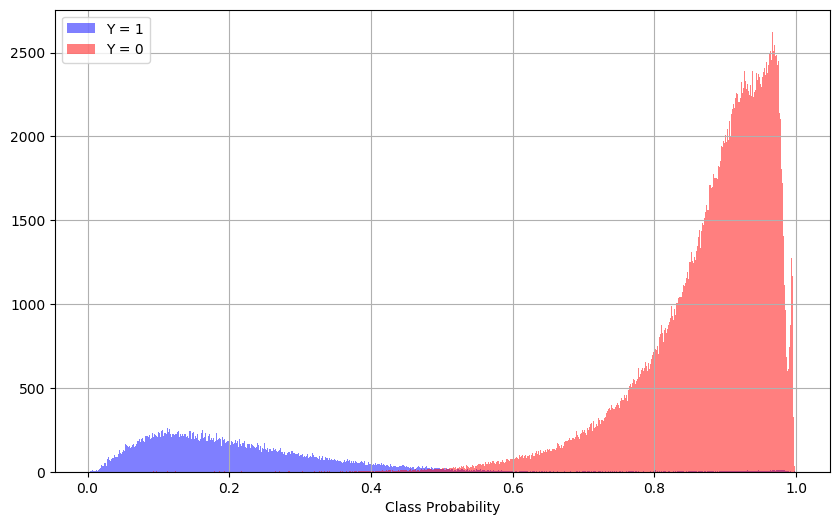

In [108]:
plt.figure(figsize=(10,6))
prob_classes[prob_classes.Y==1]['Class: Delinquent'].hist(alpha=0.5,color='blue',
                                                            bins=1000,label='Y = 1')
prob_classes[prob_classes.Y==0]['Class: No Delinquency'].hist(alpha=0.5,color='red',
                                                                bins=1000,label='Y = 0')
plt.legend()
plt.xlabel('Class Probability');

In [110]:
from sklearn.metrics import confusion_matrix

In [112]:
y_true = y_test.values.ravel()
y_predictions = better_model.predict(X_test)
confusion_matrix(y_true, y_predictions)

array([[389930,   1235],
       [ 57597,   2109]], dtype=int64)

# Building Logistic Regression Model

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state=1,solver='sag', penalty='l2')
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test.values.ravel())))

C:\Users\Norberto J Rancharan\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of logistic regression classifier on test set: 0.55


# Results

In [132]:
modeldict = {'Better GBM': 0.7313, 'Best GBM':0.7323,'Logistic Regression':0.55, 'ANN':0.8684}
pd.DataFrame(modeldict.values(),index=modeldict.keys(),columns=['Score']).sort_values('Score',ascending=False)

,Score
ANN,0.8684
Best GBM,0.7323
Better GBM,0.7313
Logistic Regression,0.5500
